# Assignment 6

Ques 1) Ask the user to enter a value (eg M) for a mathematical function
- Generate x values from - 10 to 10 using np.linspace()
- Compute y values for 
  - y = M x^2
  - y = M sin(x)
- Plot both functions in a single figure
  - Use different colors and line styles
  - Add legend, grind and title

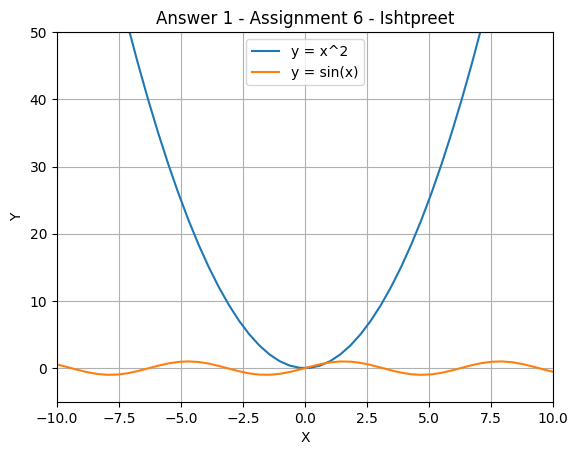

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10)
y1 = x**2
y2 = np.sin(x)

plt.plot(x, y1, label = 'y = x^2')
plt.plot(x, y2, label = 'y = sin(x)')
plt.title('Answer 1 - Assignment 6 - Ishtpreet')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-10, 10)
plt.ylim(-5, 50)
plt.grid(True)
plt.legend()
plt.show()


Ques 2) Create a dataset of five subject and scores.
- Convert it into a pandas dataframe
- Plot the scores using a seaborn bar plot with 
  - different colors for each bar
  - annotation on top of each bar
  - title, axis, labels, and grid

C:\Users\Ishtpreet\AppData\Local\Temp\ipykernel_28520\257035040.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plot.text(i, means[i]/2, str(round(means[i], 2)),


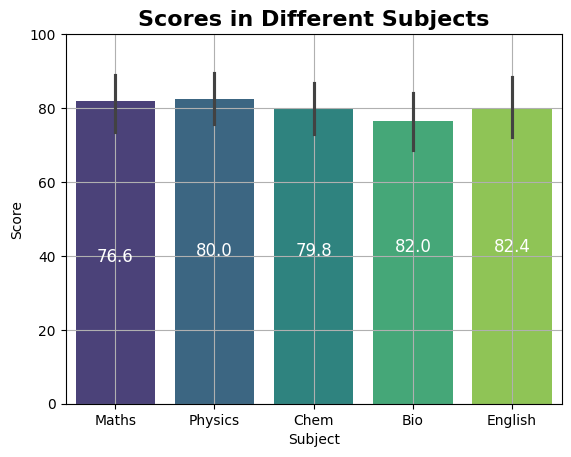

In [ ]:
import pandas as pd
import seaborn as sns

data = {
    'Subjects' : ['Maths', 'Physics', 'Chem', 'Bio', 'English'],
    'Scores': [[85, 78, 92, 67, 88], [76, 82, 89, 94, 71], [91, 68, 75, 80, 86], [62, 73, 81, 90, 77], [95, 84, 72, 69, 79]]
}
df_scores = pd.DataFrame(data)
df_scores = df_scores.explode('Scores') # to avoid unhashable list

# for annotating median on each, via https://balaji4u.medium.com/adding-annotations-to-seaborn-plots-5e5b134140c8
means = df_scores.groupby('Subjects')['Scores'].mean()

plot = sns.barplot(x='Subjects', y='Scores', data=df_scores, palette='viridis', hue='Subjects', dodge=False, legend=False) # avoiding future warning
for i in range(len(means)):
    # plot.annotate(str(medians[i]), xy = (i, medians[i]), horizontalalignment = 'center');
    plot.text(i, means[i]/2, str(round(means[i], 2)),
              fontdict= dict(color='white', fontsize = 12),
              horizontalalignment = 'center')

plt.title('Scores in Different Subjects', fontsize=16, fontweight='bold')
plt.xlabel('Subject')
plt.ylabel('Score')
plt.ylim(0, 100) 
plt.grid()
plt.show()

Ques 3) Write a python script to select your roll number as seed for NumPy and generate a dataset of 50 values using np.random.randn()
- Create a 2x2 subplot layout displaying:
  - Line plot showing cumulative sum
  - Scatter plot with random noise
- Custom with titles, axis labels and grids 

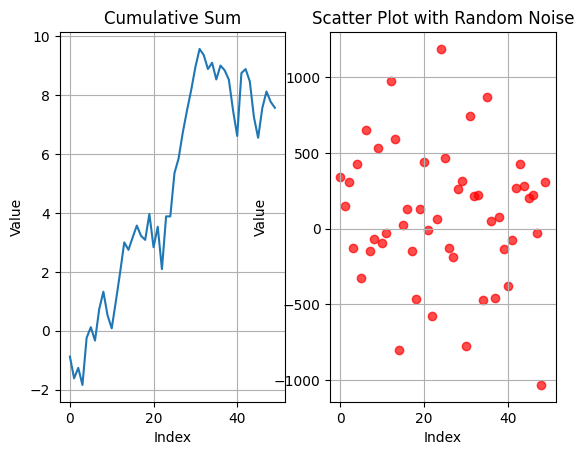

In [60]:
np.random.seed(102316043)

dataset = np.random.randn(50)
cumulative = np.cumsum(dataset)

# Subplot 1
plt.subplot(1, 2, 1)
plt.plot(cumulative)
plt.title('Cumulative Sum')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)

# Subplot 2
plt.subplot(1, 2, 2)
noise = np.random.randn(50) * (ord('i') + ord('s') + ord('h') + ord('t'))
plt.scatter(range(50), dataset + noise, color='red', alpha=0.7)
plt.title('Scatter Plot with Random Noise')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)

plt.show()





Ques 4)Download Data-set from the below link
https://github.com/AnjulaMehto/MCA/blob/main/company_sales_data.csv
Apply ‘seaborn’ library to do the following.
1. Read Total profit of all months and show it using a line plot.
2. Read all product sales data and show it using a multiline plot.
3. Plot bar chart for all the features/attributes

In [ ]:
df = pd.read_csv('company_sales_data.csv')
df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


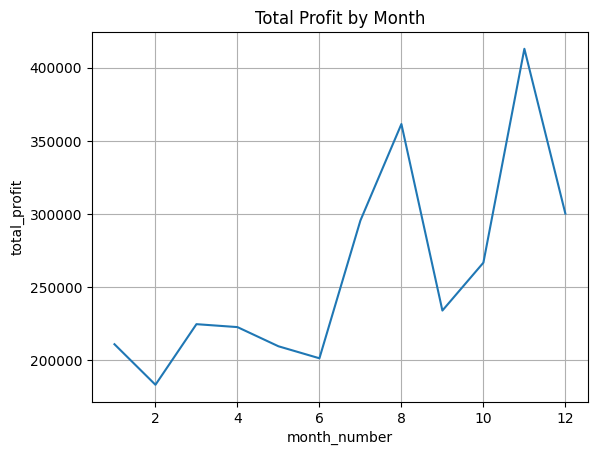

In [98]:
# 1. 
sns.lineplot(data=df, x='month_number', y='total_profit')
plt.title('Total Profit by Month')
plt.grid(True)
plt.show()

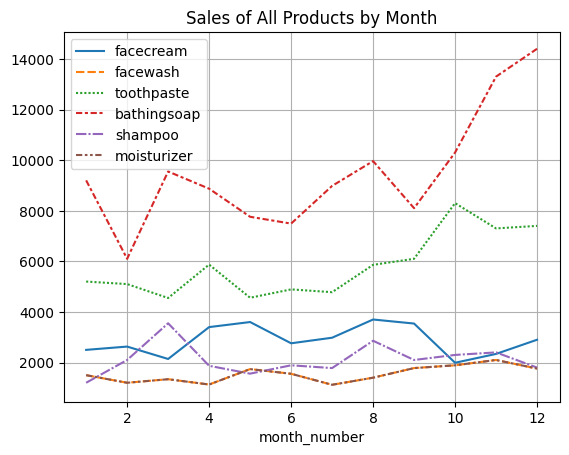

In [99]:
# 2. 
df_2 = df.drop(['total_profit', 'total_units'], axis=1) # Not required
df_2 = df_2.set_index('month_number') #  allows month number to be X 
sns.lineplot(data=df_2)
plt.title('Sales of All Products by Month')
plt.grid(True)
plt.show()


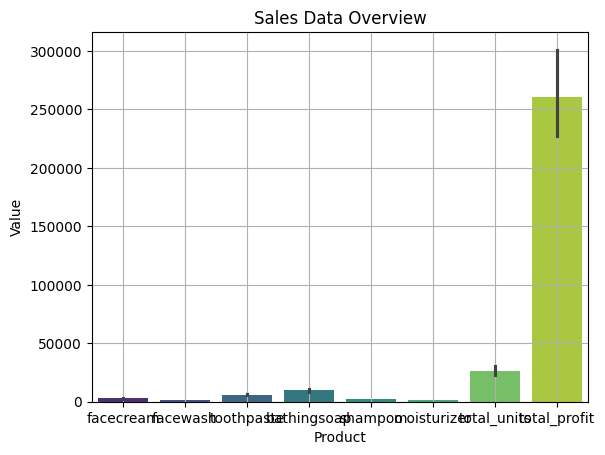

In [108]:
# 3.
df_melted = pd.melt(df, id_vars=['month_number'], var_name='Product', value_name='Value')
sns.barplot(data=df_melted, x='Product', y='Value', hue='Product', palette='viridis', dodge=False, legend=False)
plt.title('Sales Data Overview')
plt.grid(True)
plt.show()